# Introduction to Machine Learning with Scikit Learn and Pandas

In [4]:
# For loading images in the ipython from disk:
from IPython.display import Image

### Context: 

This ipython notebook was created for the [Lisbon Open Data Meetup](http://www.meetup.com/Lisbon-Open-Data-Meetup/), to give first time users a starting point with Machine Learning. 

It is entirely free and open source, and anyone can use, copy, or change it without any permission. If you want to use it to teach others, we will be super happy. It assumes no prior knowledge of Machine Learning concepts.  

The tools shown here do however assume you can understand super basic [Python](https://www.python.org/), but the code we use in these examples is so simple. To be honest, you can probably get away with just using a bit of common sense.  

We don't teach Python at Open Data Meetup, but if you are interested you can learn enough to be up to speed with the awesome [Codecademy course](https://external.codecademy.com/learn/python), which is 100% free, super practical and easy, and takes about 13 hours.

The expected time to be up to speed with the content on this notebook is about 2 hours. 

### What is machine learning? 

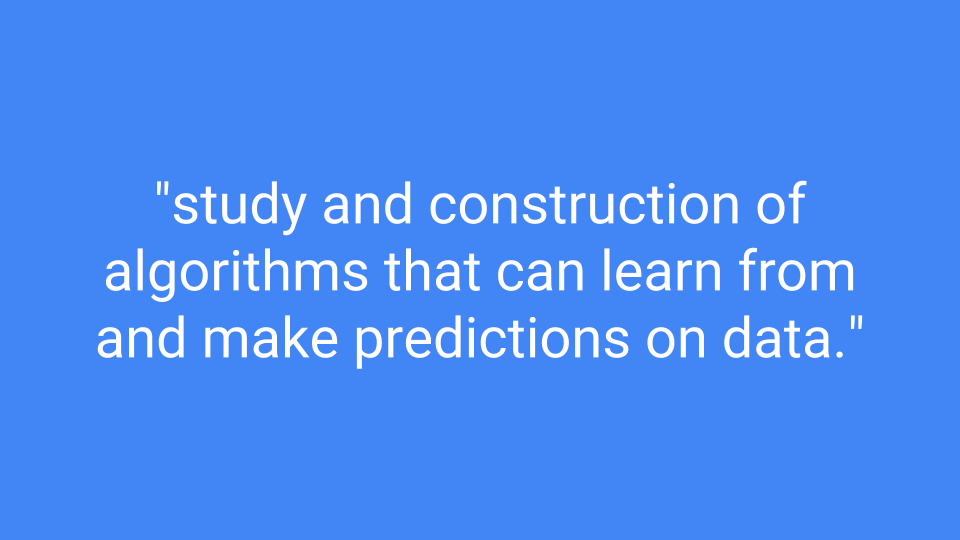

In [45]:
Image(filename='slides/what_is.png') 

### What can we expect to learn by the end of this class? 

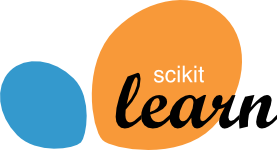

In [46]:
Image(filename='slides/scikit-learn-logo-notext.png')

To learn the basics of the magnificant [Scikit Learn library](http://scikit-learn.org/) for machine learning in Python. Scikit was developed by a large open source community, and aims to make machine learning easy to use for everyone who knows a bit of Python. 

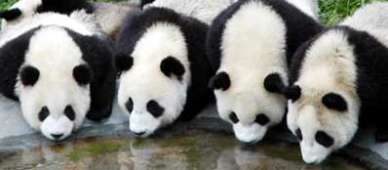

In [47]:
Image(filename='slides/pandas-drinking-cr.png') 

And the basics of the no less spectacular [Pandas](http://pandas.pydata.org/) library for data manipulation. Pandas helps you with wrangling, changing, aggregating and even to a point visualizing data, and is an indispensable tool in the data scientist's tool-kit.  

And, for the sake of having examples in this particular notebook: 

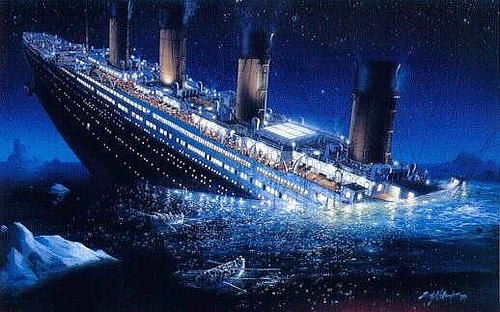

In [48]:
Image(filename='slides/titanic.jpeg')

We will be looking into the [Titanic Dataset](https://www.kaggle.com/c/titanic) from [Kaggle](https://www.kaggle.com/). It is quite small (so does not require anything very fancy), but is excellent for understanding the basics. 

What you learn with this dataset extends very naturally to new datasets. 

# Quick note before we start:

If you want to run these commands and mess around with them, you can! 
* Step 1: [install Anaconda](https://www.continuum.io/downloads) (make yourself a cup of tea, it takes a while to install) 
* Step 2: [clone the repository from GitHub](https://github.com/LxOpenDataMeetup/Intro-to-Scikit-and-Pandas). Thos who do not know how to clone can cheat and just download it directly from [here](https://github.com/LxOpenDataMeetup/Intro-to-Scikit-and-Pandas/archive/master.zip). (Learning [Git](https://git-scm.com/) is way worth it though!)
* Step 3: On your command line, navigate to the folder you just cloned/downloaded, and type `ipython notebook`

However you just want to read through the notebook to understand if you are comfortable with the concepts, that is also fine, and everything should be pre-run for you. 

If you run into trouble, go to [this link](https://github.com/LxOpenDataMeetup/Intro-to-Scikit-and-Pandas/issues) and check if anyone has already asked the question you are on. If not, [create a new issue](https://github.com/LxOpenDataMeetup/Intro-to-Scikit-and-Pandas/issues/new) and tell us about it. We will reply as soon as we can, and your question will be available to the next person. 

**Don't be shy to ask for help!** Unless it is crazy specific (e.g. you are using Windows NT and having a problem with setting up), you can probably find the answer by typing your question on [Stack Overflow](http://stackoverflow.com/). Before asking it is good practice to [read the advice on how to ask questions](http://stackoverflow.com/questions/ask/advice). 

# Step 1: let's look at our data: 

Now for the interesting stuff! Let's start by importing Pandas, and Matplotlib (for plotting): 

In [49]:
# For using pandas:
import pandas as pd

# For creating charts: 
from matplotlib import pyplot as plt

# for having the graphs show up in the notebook, instead of as a pop up: 
% matplotlib inline

### Importing data:

Next up, let's use pandas to [read the data from the CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).  
Pandas can [read from a number of formats](http://pandas.pydata.org/pandas-docs/stable/io.html), but let's stick to something simple for now. 

In [50]:
titanic = pd.read_csv('titanic_data/train.csv');

So what is this titanic object? 

In [51]:
type(titanic)

pandas.core.frame.DataFrame

It is a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).  
These can be thought of (for simplicity, don't shoot me) as kind of "excel tables", with rows and columns. They are in fact much more powerful, and can have more dimentions, but this idea of "Rows and Columns" are a good way to start. 

Pandas operates with [Dataframes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) and [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), and Series can be thought of as Vectors with just one dimention, or a single "Column". 

Now that advanced programmers are already mad at me for using Excel terminology, let's move on to the actual data with Titanic! 

### Previewing data:

Getting a preview, using the [head](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function: 

In [52]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

How many "rows" and "columns"? 

In [53]:
titanic.shape

(891, 12)

### Manipulating data:

Ok, so quite small amounts of data. However, some variables contain no useful information, so let's get rid of them by using [drop](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html): 

In [54]:
titanic.drop('Name', inplace=True, axis=1)

`axis = 1` means *along the column*, while `axis = 0` would mean *along the row*

Let's preview again:

In [55]:
titanic.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male   22      1      0         A/5 21171   
1            2         1       1  female   38      1      0          PC 17599   
2            3         1       3  female   26      0      0  STON/O2. 3101282   
3            4         1       1  female   35      1      0            113803   
4            5         0       3    male   35      0      0            373450   

      Fare Cabin Embarked  
0   7.2500   NaN        S  
1  71.2833   C85        C  
2   7.9250   NaN        S  
3  53.1000  C123        S  
4   8.0500   NaN        S

### Observing data:

Next let's examing the data. Of the 891 people, how many survived? 

In [56]:
titanic.Survived.value_counts()

0    549
1    342
dtype: int64

Uff... not pretty. Survived being (1) means they lived, so most of them did not.  
How old were all of these people?

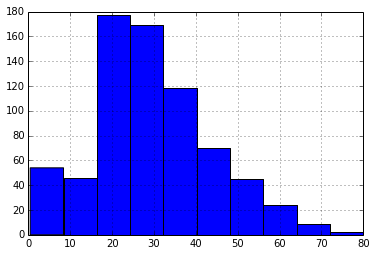

In [57]:
titanic.Age.hist()

More specifically, how old were these people by "survived or not"? 

array([<matplotlib.axes.AxesSubplot object at 0x7f6075a3bc10>,
       <matplotlib.axes.AxesSubplot object at 0x7f6066d62090>], dtype=object)

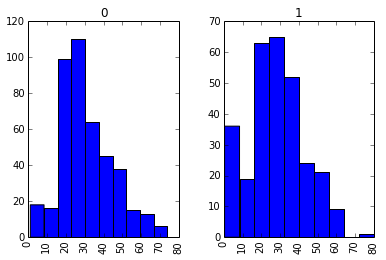

In [58]:
titanic.hist(column='Age', by='Survived')

It would seem at least that smal children had a decent chance of surviving.  
Were these people gentlemen?

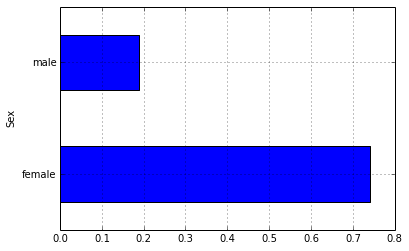

In [59]:
titanic.groupby('Sex').Survived.mean().plot(kind = 'barh')

### Multiple ways to use Pandas (and the safest way to do it):

You might have noticed something strange so far:  
I'm using dot notation and bracket notation intermittently to do the same thing.  

Let's look at the following: 

In [60]:
titanic.Age.head(2)

0    22
1    38
Name: Age, dtype: float64

In [61]:
titanic['Age'].head(2)

0    22
1    38
Name: Age, dtype: float64

They both work! However, in general, it is safest to use the bracket notation.

### Going a bit more advanced in observing data:

Back to data analysis!  
Let's look at something more complicated. How were the ages, by social class? 

[]

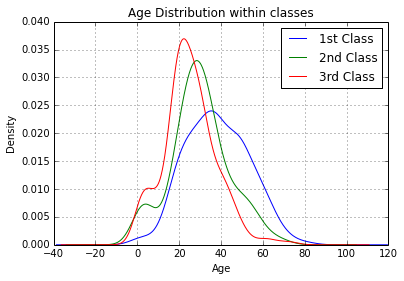

In [62]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
plt.plot()

Don't be intimidated by the plt.xlabel stuff. the first 3 lines are Pandas, and would work on their own, the rest is just to create the labels and make it pretty with [matplotlib](http://matplotlib.org/), which is the python library for plotting. You can easily live without it at the start. 

Now, and important maximum from Data Science: 

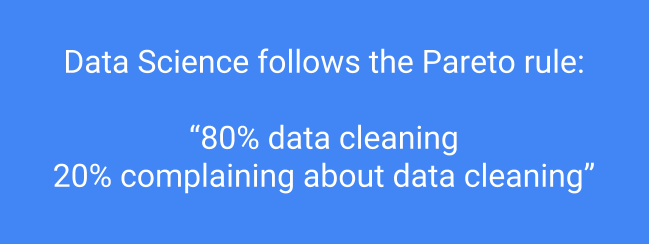

In [63]:
Image(filename='slides/paretto.png') 

Let's get into data cleaning. 

Do we have data quality problems? 

### Checking for missing data: 

In [64]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have tons of data problems in Cabin. Maybe we don't care about cabins after all: 

In [65]:
titanic.drop('Cabin', inplace = True, axis = 1)

But we do care about ages...  
Let's look at a few examples that have no ages.  

PS: You'll notice the use of "masks" here. Don't worry, they are explained a bit later. For now we're just worried about data cleaning. 

Let's look at a few examples of data with no Ages. The [.isnull()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) function returns True if it finds a null (missing data) and False otherwise. 

In [66]:
mask = titanic['Age'].isnull()
titanic[mask].head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  Ticket     Fare  \
5             6         0       3    male  NaN      0      0  330877   8.4583   
17           18         1       2    male  NaN      0      0  244373  13.0000   
19           20         1       3  female  NaN      0      0    2649   7.2250   
26           27         0       3    male  NaN      0      0    2631   7.2250   
28           29         1       3  female  NaN      0      0  330959   7.8792   

   Embarked  
5         Q  
17        S  
19        C  
26        C  
28        Q

Let's look a bit deeper into the data, with `describe`. 

Note a cool thing: Pandas can calculate mean, median etc by ignoring the missing data.

In [67]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Fixing problems with missing data

Crucially, machine learning algorithms **DON'T WORK WITH MISSING DATA!**  

That means we will have to deal with the mising data problem.  
For simplicity, let's say that everyone who has no age is the mean age

Let's start by getting the mean age. Pandas is über cool in getting basic metrics, such as mean, median, standard deviation etc even with missing data, so we can use functions such as [.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [68]:
mean_age = titanic.Age.mean()
print mean_age

29.6991176471


So now we want to fill in the missing data with the mean age. 

How do we do this? With the [fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) method! 

In [69]:
titanic['Age'].fillna(mean_age, inplace = True)

Did it work? Let's try the following:  
On the Age column, i'm going to call isnull(). That will return something like this:

(I'm using the head command to only show 5 examples)

In [70]:
titanic['Age'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

Now we can sum up the times that returned True.  

Note: `sum(True+True) = 2`, and `False` sums to 0. There might also be other ways to do this.

In [71]:
titanic['Age'].isnull().sum()

0

Excellent, so no more nulls in the Age columns. Any other problems? 

In [72]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Oh, right, we have the 2 rows in embarked. But from the 889 this is quite irrelevant, so I'll just drop all remaining nulls, with the dropna command on the whole dataframe. 

Remember to use the inplace=True, or the dataframe will remain the same. Pandas defaults to inplace=False, so you need to be specific when doing alterations. 

In [73]:
titanic.dropna(inplace=True)

Did it work? 

In [74]:
titanic.shape

(889, 10)

Hurray! 

### Masks and filtering

So you might have noticed I used a Mask when I was dropping data. This means I gave the command a "filter". Let's take a look at a simple example: 

Let's remember our age column:

In [75]:
titanic['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: float64

Now let's say we mask (filter) the rows that have ages larger than 30:

In [76]:
mask = titanic['Age'] > 25

What does this mask look like?

In [77]:
mask.head()

0    False
1     True
2     True
3     True
4     True
Name: Age, dtype: bool

Hmm... so what can we do with this? Quite a few things. I can, for instance, create a subset of over 30s: 

In [78]:
titanic[mask].head()

PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch  \
1            2         1       1  female  38.000000      1      0   
2            3         1       3  female  26.000000      0      0   
3            4         1       1  female  35.000000      1      0   
4            5         0       3    male  35.000000      0      0   
5            6         0       3    male  29.699118      0      0   

             Ticket     Fare Embarked  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  
5            330877   8.4583        Q

Notice that it skipped the first passenger, as he was not in our mask. How big is our masked dataset?

In [79]:
print 'full dataset:', titanic.shape
print 'masked (Age>25) dataset:', titanic[mask].shape

full dataset: (889, 10)
masked (Age>25) dataset: (588, 10)


I can then get some statistics on this over30 dataset:

In [80]:
titanic[mask].Survived.mean()

0.36734693877551022

40% of over 30s survived. How does this compare to the under 30s? We can simply invert the mask using ~

In [81]:
titanic[~mask].Survived.mean()

0.41196013289036543

We can also do more sophisticated thing such as compare histograms. I'll create a new mask, filtering those who survived:

In [82]:
survivors = titanic['Survived'] == 1

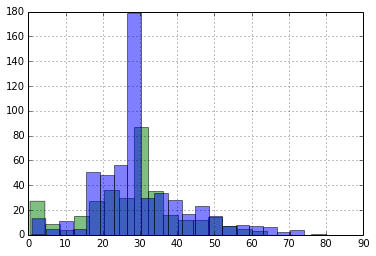

In [83]:
titanic[survivors]['Age'].hist(alpha = 0.5, color= 'g', bins = 20)
titanic[~survivors]['Age'].hist(alpha = 0.5, color= 'b', bins = 20)

There are other ways to use pandas, namely the extremely powerful [groupby methods](http://pandas.pydata.org/pandas-docs/stable/groupby.html), but for now we'll leave it at these basic functions. 

There will probably be an "Advanced Pandas" notebook on the meetup soon. 

### Making categorical variables numerical

An important question on using machine learning is the use of numerical and categorical data. Categories (such as men & women)

Let's look at our data again: 

In [84]:
titanic.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male   22      1      0         A/5 21171   
1            2         1       1  female   38      1      0          PC 17599   
2            3         1       3  female   26      0      0  STON/O2. 3101282   
3            4         1       1  female   35      1      0            113803   
4            5         0       3    male   35      0      0            373450   

      Fare Embarked  
0   7.2500        S  
1  71.2833        C  
2   7.9250        S  
3  53.1000        S  
4   8.0500        S

This will not go into a machine learning algorith. It **expects numbers, not strings**, so will fail due to the Sex, Ticket and Embarked columns. 

Let's look at an example of the Sex column:

In [85]:
titanic.Sex.values[0:10]

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female'], dtype=object)

In [86]:
pd.Categorical.from_array(titanic.Sex).codes[0:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int8)

Let it be so! 

In [87]:
titanic.Sex = pd.Categorical.from_array(titanic.Sex).codes

In [88]:
titanic.Ticket = pd.Categorical.from_array(titanic.Ticket).codes
titanic.Embarked = pd.Categorical.from_array(titanic.Embarked).codes

In [89]:
titanic.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3    1   22      1      0     522   7.2500   
1            2         1       1    0   38      1      0     595  71.2833   
2            3         1       3    0   26      0      0     668   7.9250   
3            4         1       1    0   35      1      0      48  53.1000   
4            5         0       3    1   35      0      0     471   8.0500   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2

So now we get to... 

# Part 2: Machine Learning

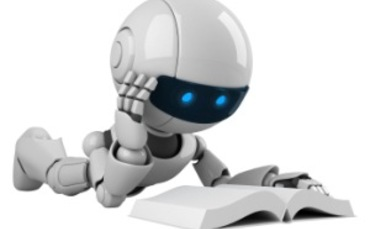

In [90]:
Image(filename='slides/machine_learning.jpg') 

What is the most basic "machine learning" algorithm we all know and love? Well, a linear regression can be thought as a very simple form of machine learning [citation needed], as technically it can learn from data and make predictions. 

Let's use it to explain the scikit-learn API, and then we'll move on to more interesting algorithms. 

Let's start by importing a linear model from scikit-learn (from here on mentioned as sklearn) 

In [91]:
from sklearn import linear_model

Now that we have imported it, let's create a classifier object called "regr", and say it is a [Scikit linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

In [92]:
regr = linear_model.LinearRegression()

Let's also quickly subset a small bit of the dataset to fit, so that it remains intuitive (we'll go on to the full dataset later): 

In [93]:
titanic[['Pclass', 'Age', 'Survived']].head()

Pclass  Age  Survived
0       3   22         0
1       1   38         1
2       3   26         1
3       1   35         1
4       3   35         0

Now for the magic! Scikit has the fit function, which fits the classifier to the data. It always follows the same logic:   
`classifier.fit(training_data, test_data)`

In [94]:
regr.fit(titanic[['Pclass', 'Age']], titanic.Survived)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now our linear regression has been fit, we can actually use it to make predictions. Let's try and predict the "Survived" column, by giving it only the "Pclass" and "Age" columns. 

The logic here is always: 
`classifier.predict(features_set)`

In [95]:
predictions = regr.predict(titanic[['Pclass', 'Age']]);

Let's see it's first 10 predictions: 

In [96]:
predictions[0:10]

array([ 0.2800585 ,  0.62592453,  0.24901514,  0.64920705,  0.17916759,
        0.22030688,  0.5017511 ,  0.43527529,  0.2412543 ,  0.57716495])

As it is a regressor, the linear regression will predict "probability of death" instead of making predictions of "did he die". This is fine, we can find the best answers by thresholding the results as under and over 0.5: 

In [97]:
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Now we should have predictions of 1 (survived) and 0 (did not survive): 

In [98]:
predictions[0:10]

array([ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.])

Excellent! How accurate were we? 

Let's quickly import an [accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) from scikit learn: 

In [99]:
from sklearn.metrics import accuracy_score

In scikit, all scores work as follows:   
`some_score.(reality, predictions)`

In [100]:
accuracy_score(titanic.Survived, predictions)

0.70078740157480313

Aha! So with this simple algorithm we can predict if someone survived with quite an acceptable accuracy. 

Or can we? 

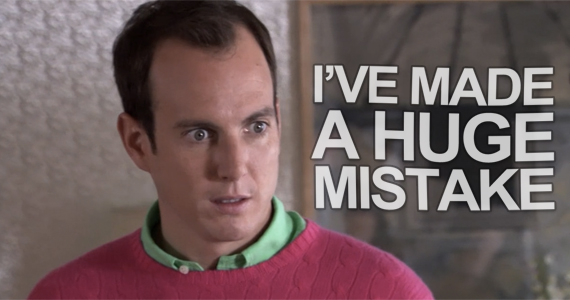

In [104]:
Image(filename='slides/gob-bluth.jpg') 

# Part 3: Validation

One golden rule of data science: always be skeptical of your results. 

A very important concept is that of "training set", and "test set". If you want to build a model, you should always build it with one part of the data, and evaluate it on another. Not doing this will lead you to overfitting, meaning that you end up with a model that can only predict the data it was created with. 

There will be a bit more on over fitting at the end of this notebook. For now the important thing is the following: 

**Always train on one part of the dataset, and test on another, or your metrics will be extremely over-confident!**

So what is the best way to slpit our data? We should start by considering a couple of concepts: 

Trainig set: the dataset from which the model is actually built (on which the parameters are tuned) 
Test set: the dataset on which the model is validated

X: the part of the dataset that has the features (the "columns" we want to use to predict) 
y: the label (or target), which is the "column" we are trying to predict (in our case "Survived")

A common strategy is to use 80% of our data as training data, and 20% as test data. More advanced strategies naturally exist, but they are beyond the scope of this notebook. 

The following image is a very useful cheat sheet, I suggest you keep it at hand as you go through the notebook.

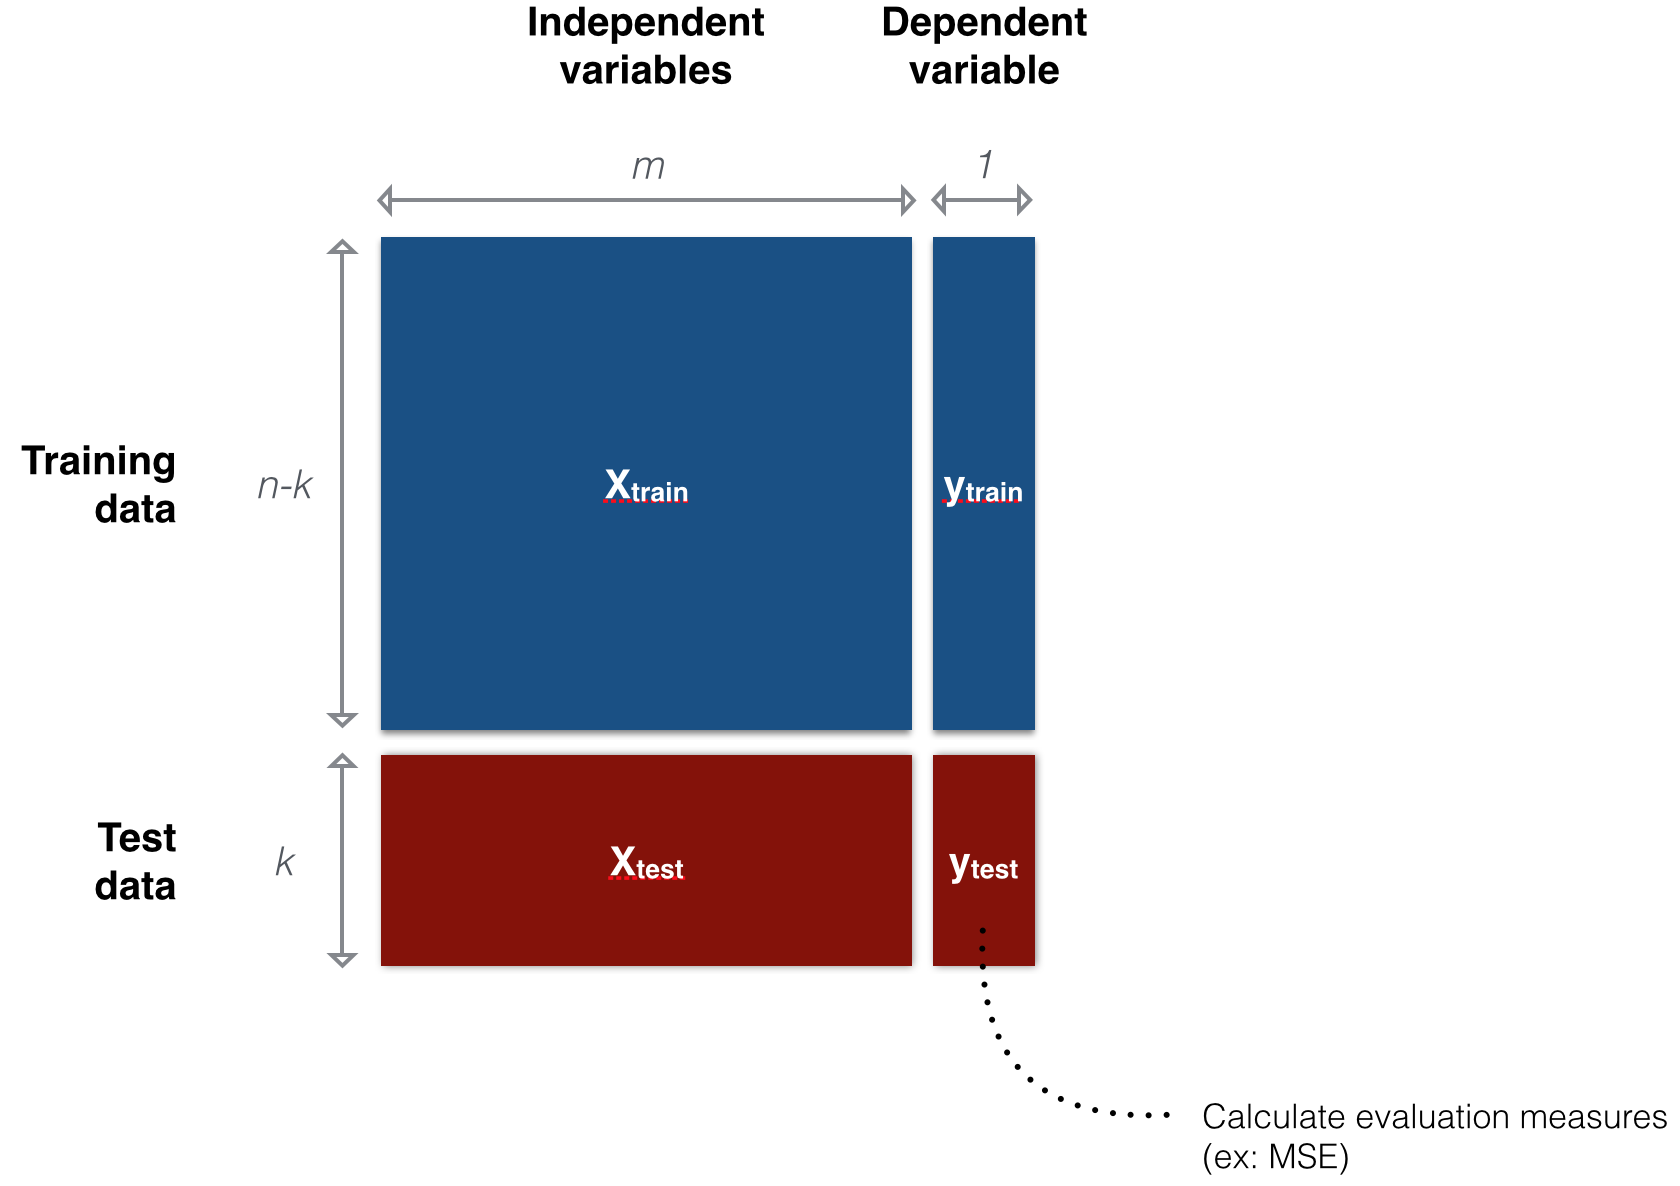

In [105]:
Image(filename='slides/partition.png')

So, how much data did we have again? 

In [106]:
titanic.shape

(889, 10)

Ok, let's make our first 700 rows our training set, and the rest the test set. 

Note: there are [better ways to do this](http://scikit-learn.org/stable/modules/cross_validation.html), we're just using this one because it is easy. 

In [107]:
train = titanic.iloc[0:700]
test = titanic.iloc[701:889]

So remind me, what were our columns? 

In [142]:
X_columns = sorted(titanic.columns)
X_columns

['Age',
 'Embarked',
 'Fare',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket']

We want this to be the features matrix X (see image above), so let's get rid of the target column: 

In [109]:
X_columns.remove('Survived')

The X_train will be the X columns of the training set, and y_train will be the target column of the training set:

In [111]:
X_train = train[X_columns]
y_train = train['Survived']

Same logic for the test set: 

In [112]:
X_test = test[X_columns]
y_test = test['Survived']

Excellent! Time to fit some classifiers! 

In [143]:
X_train.head()

Age  Embarked     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Ticket
0   22         2   7.2500      0            1       3    1      1     522
1   38         0  71.2833      0            2       1    0      1     595
2   26         2   7.9250      0            3       3    0      0     668
3   35         2  53.1000      0            4       1    0      1      48
4   35         2   8.0500      0            5       3    1      0     471

Lets start by an extremely simple task: let's fit a linear regression to a couple of our features, Pclass and Age: 

In [113]:
regr.fit(X_train[['Pclass', 'Age']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
predictions = regr.predict(X_test[['Pclass', 'Age']]);
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
accuracy_score(y_test, predictions)

0.72340425531914898

More data!

In [115]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
predictions = regr.predict(X_test);
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
accuracy_score(y_test, predictions)

0.81914893617021278

What were the betas on this linear regression?

In [117]:
zip(X_test.columns, regr.coef_)

[('Age', -0.0053184296984177416),
 ('Embarked', -0.032616936079941525),
 ('Fare', 0.00016693950823957874),
 ('Parch', -0.030059842595405895),
 ('PassengerId', 5.4257866023846079e-05),
 ('Pclass', -0.15499120931217344),
 ('Sex', -0.51476926072605922),
 ('SibSp', -0.033618306446610374),
 ('Ticket', -0.00010346146853077908)]

Let's try a slightly different algorithm, a [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

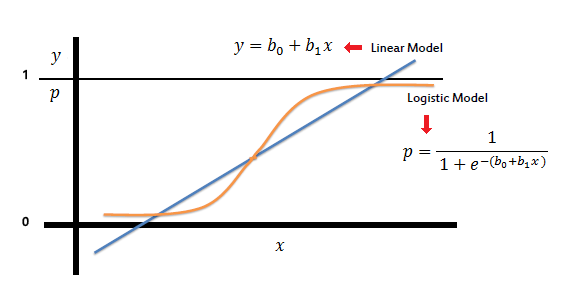

In [118]:
Image(filename='slides/LogReg_1.png')

You will notice that the sequence of steps is very similar to what we did for the linear regression. 

Import the classifier:

In [119]:
from sklearn.linear_model import LogisticRegression

Create a classifier object: 

In [120]:
logit = LogisticRegression()

Fit it to some data:


In [121]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

Make predictions, and score your results:

In [122]:
predictions = logit.predict(X_test);
accuracy_score(y_test, predictions)

0.82446808510638303

Now let's try something a bit different, a [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) classifier: 

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
kn = KNeighborsClassifier()

In [125]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [126]:
prediction = kn.predict(X_test)

In [127]:
accuracy_score(y_test, prediction)

0.69680851063829785

And for something a bit more advanced, a [Random Forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): 

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier()

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
predictions = rf.predict(X_test);
accuracy_score(y_test, predictions)

0.86170212765957444

Up to here we've been allowing scikit to use the default parameters, but we can control them by passing them as arguments. Here I'll pass some (probably badly chosen) parameters to exemplify:

In [133]:
rf = RandomForestClassifier(n_estimators=100, class_weight='auto', max_depth=50, n_jobs=-1)

In [134]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
predictions = rf.predict(X_test);
accuracy_score(y_test, predictions)

0.87234042553191493

#### What algorithm is right for my problem? 

There are many schools of thought on this, but a useful point to start is with Scikit-Learn's cheat sheet: 

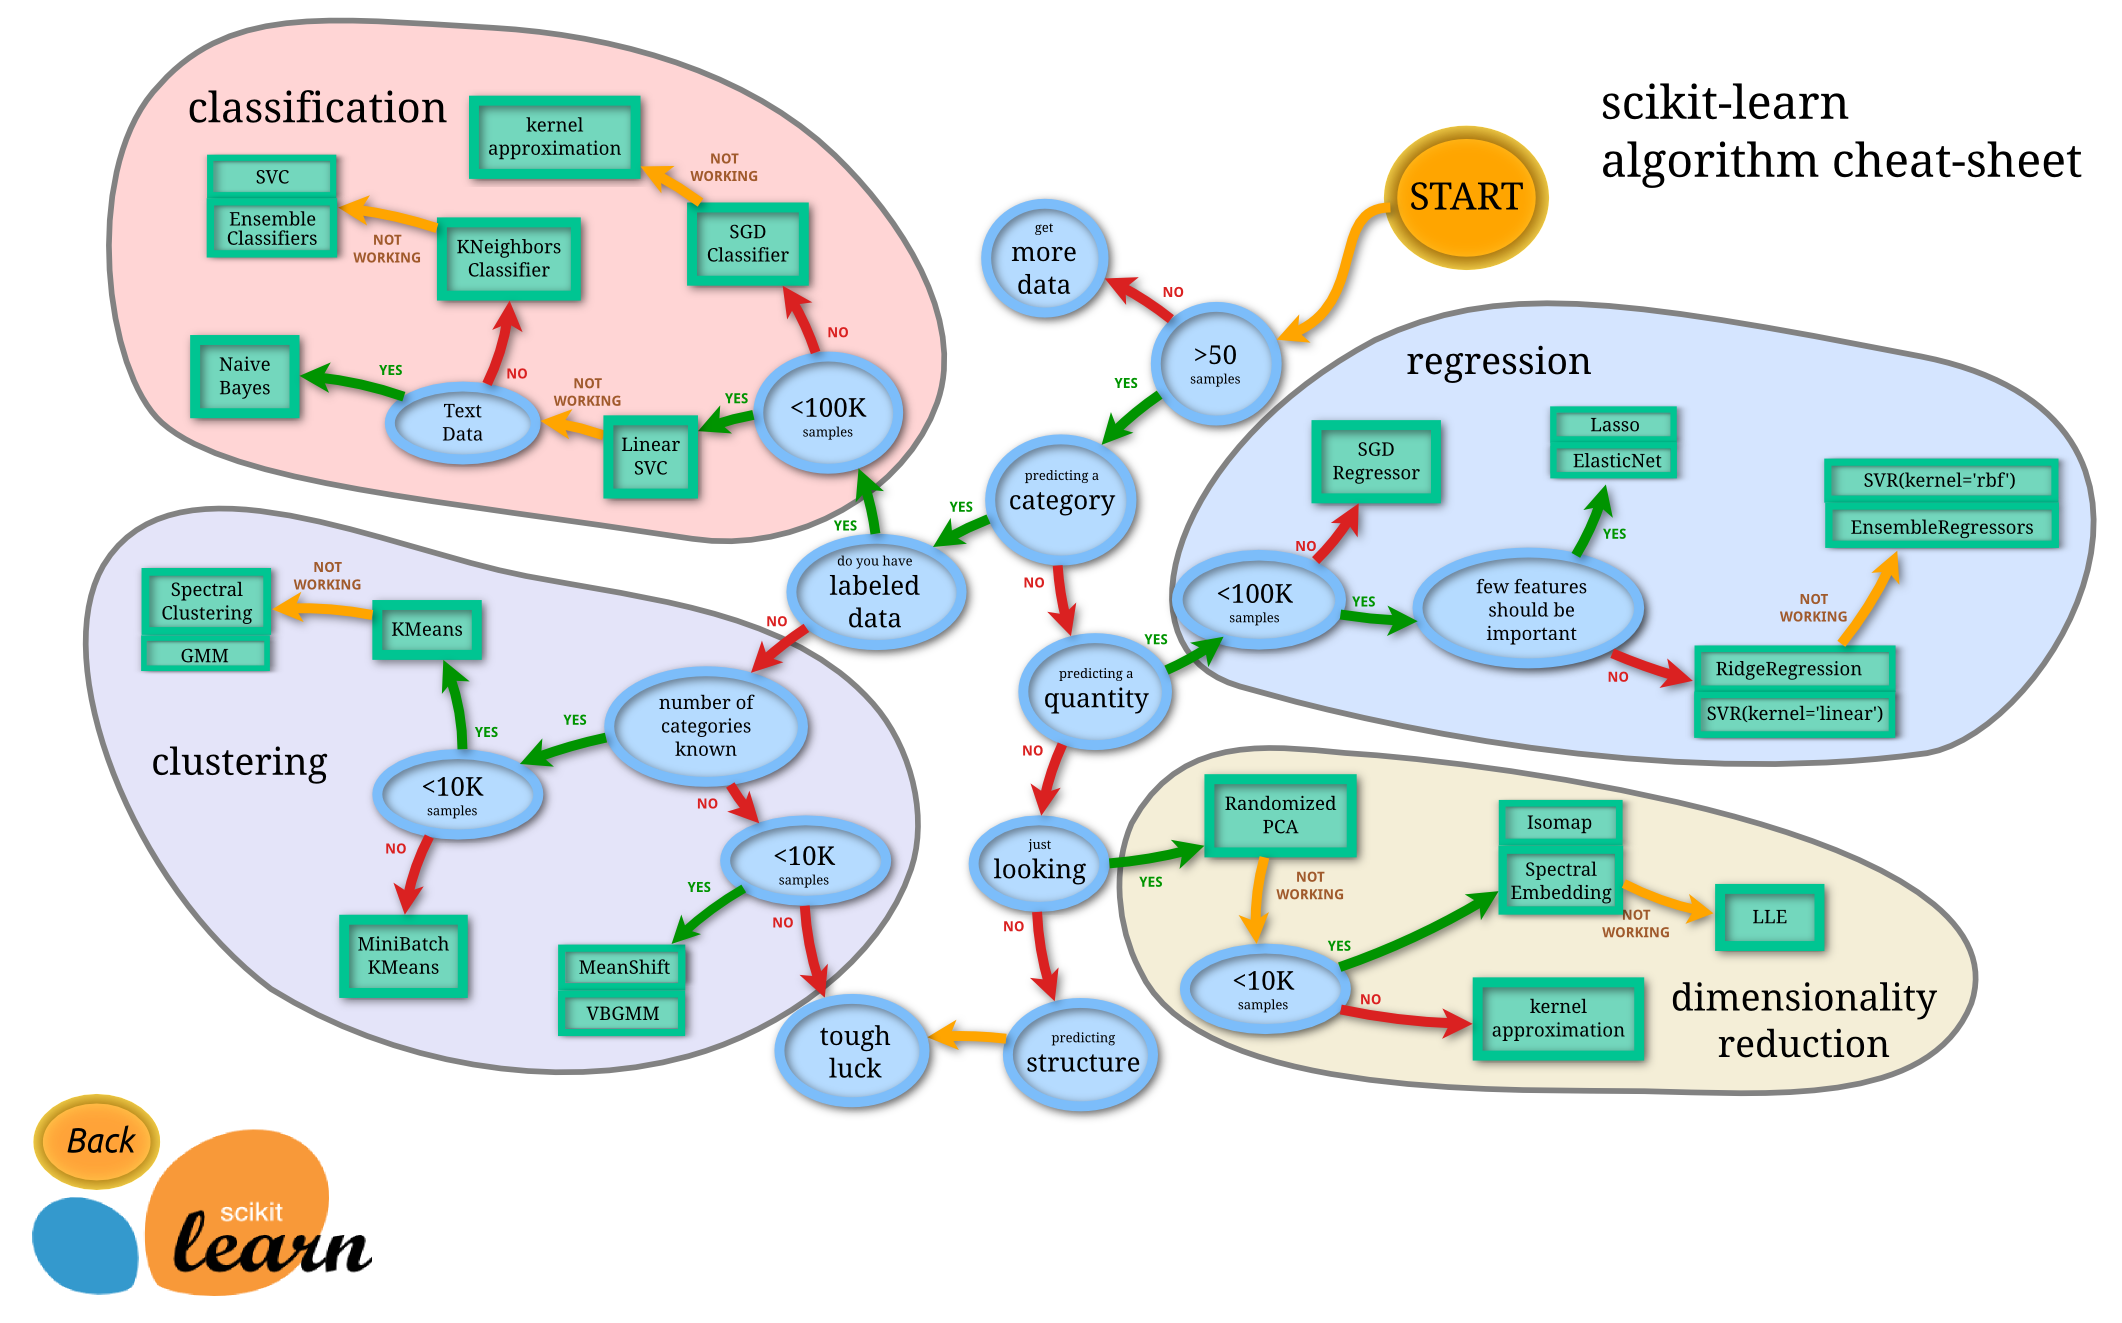

In [136]:
Image(filename='slides/ml_map.png')

# Part 4: Common mistakes: 

### Overfitting:

One common theme through this notebook is the following: if your results look too good to be true, they are not true. 

Let us consider this idea. We want to predict who survived on the titanic. We start with reasonable features such as Age, Class, etc. 

But we think our results aren't good enough. So we notice that everyone who had an "s" in their name, but not an "h", survived, and we make that a feature. Suddenly our model explains all the training data. 

Alternatively, let's say we want to predict how a stock price evolves (which is almost always a terrible idea). We find that the stock of Apple varies with the square of A and the seventh power of B and (include more and more nonsense). 

These are problems of overfitting, where our model is too complex and explains the traning data perfectly, but will never be able to explain new observations. 

A good way to visualize overfitting is with the following charts: 

In [2]:
Image(filename='slides/underfitting-overfitting.png')

NameError: name 'Image' is not defined

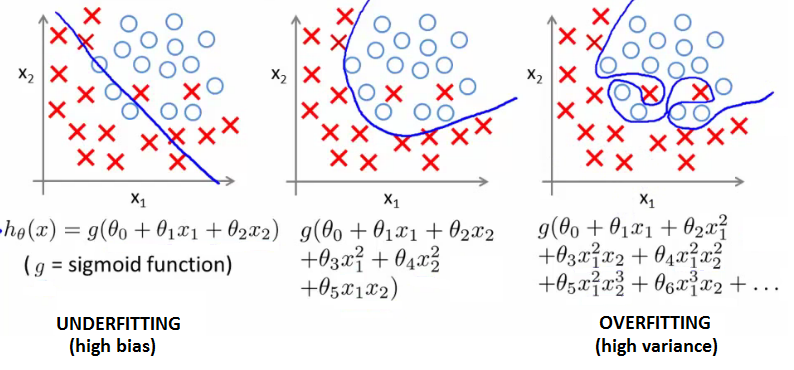

In [139]:
Image(filename='slides/reg.png')

To avoid overfitting, we must always test on data that was not seen when building the model. Alternatively, for more advanced users, there are techinques such as [K-folds cross validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html) that allow you to use all of the data, while avoiding overfitting. These are beyond our scope for now. 

### Using the wrong metrics: 

Let's say a bank has a problem with fraudulent transactions. In every 100.000 transactions, one is generally fraud, and they want to avoid it.  

A salesman comes up to them and says "I can predict if something is fraud with over 99.9% accuracy." 

Is he possibly telling the truth? 

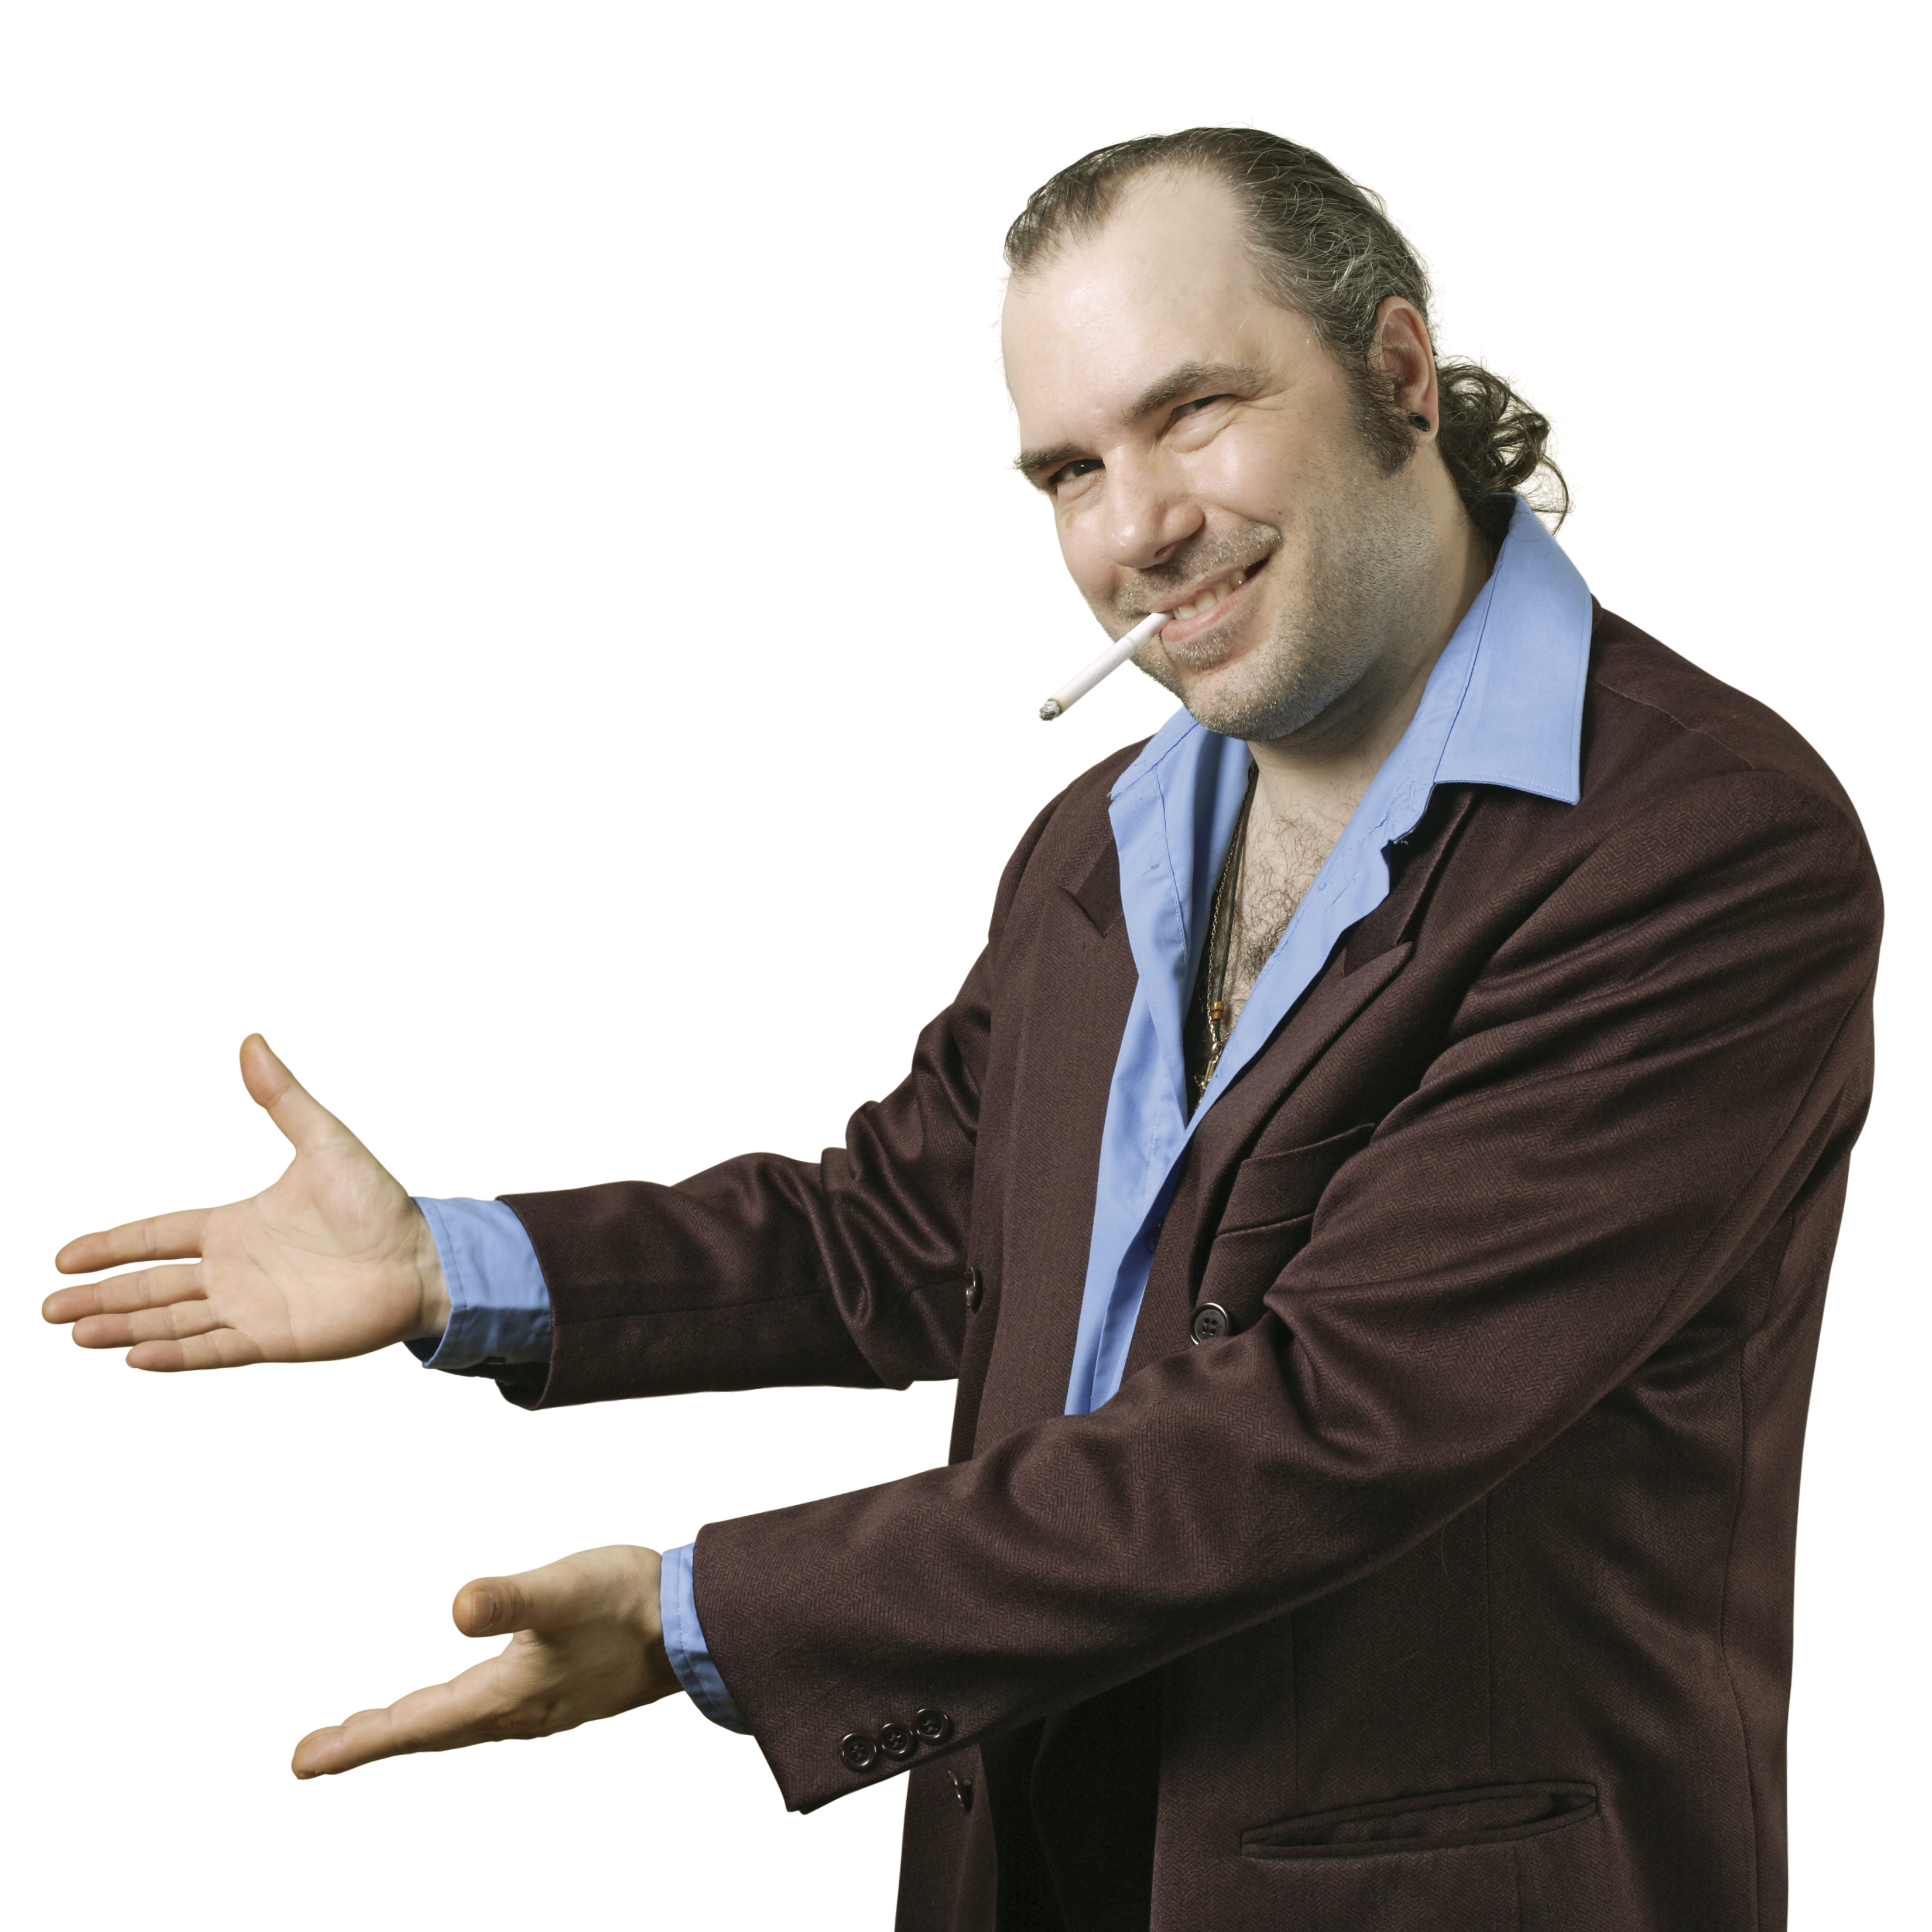

In [6]:
Image(filename='slides/is_he_telling_the_truth.jpg')

The answer is... he is almost certainly telling the truth. 

Consider the following algorithm (let's not forget, only 1 in 100.000 transactions are fraud)

In [7]:
def my_super_cool_algorithm():
    return not_fraud

If we always say it isn't fraud, we are only wrong once in every 100000. That means we have an accuracy of 99,999%

The lesson here is: accuracy alone, is relatively meaningless. We must go into the complicated world of validation metrics. 

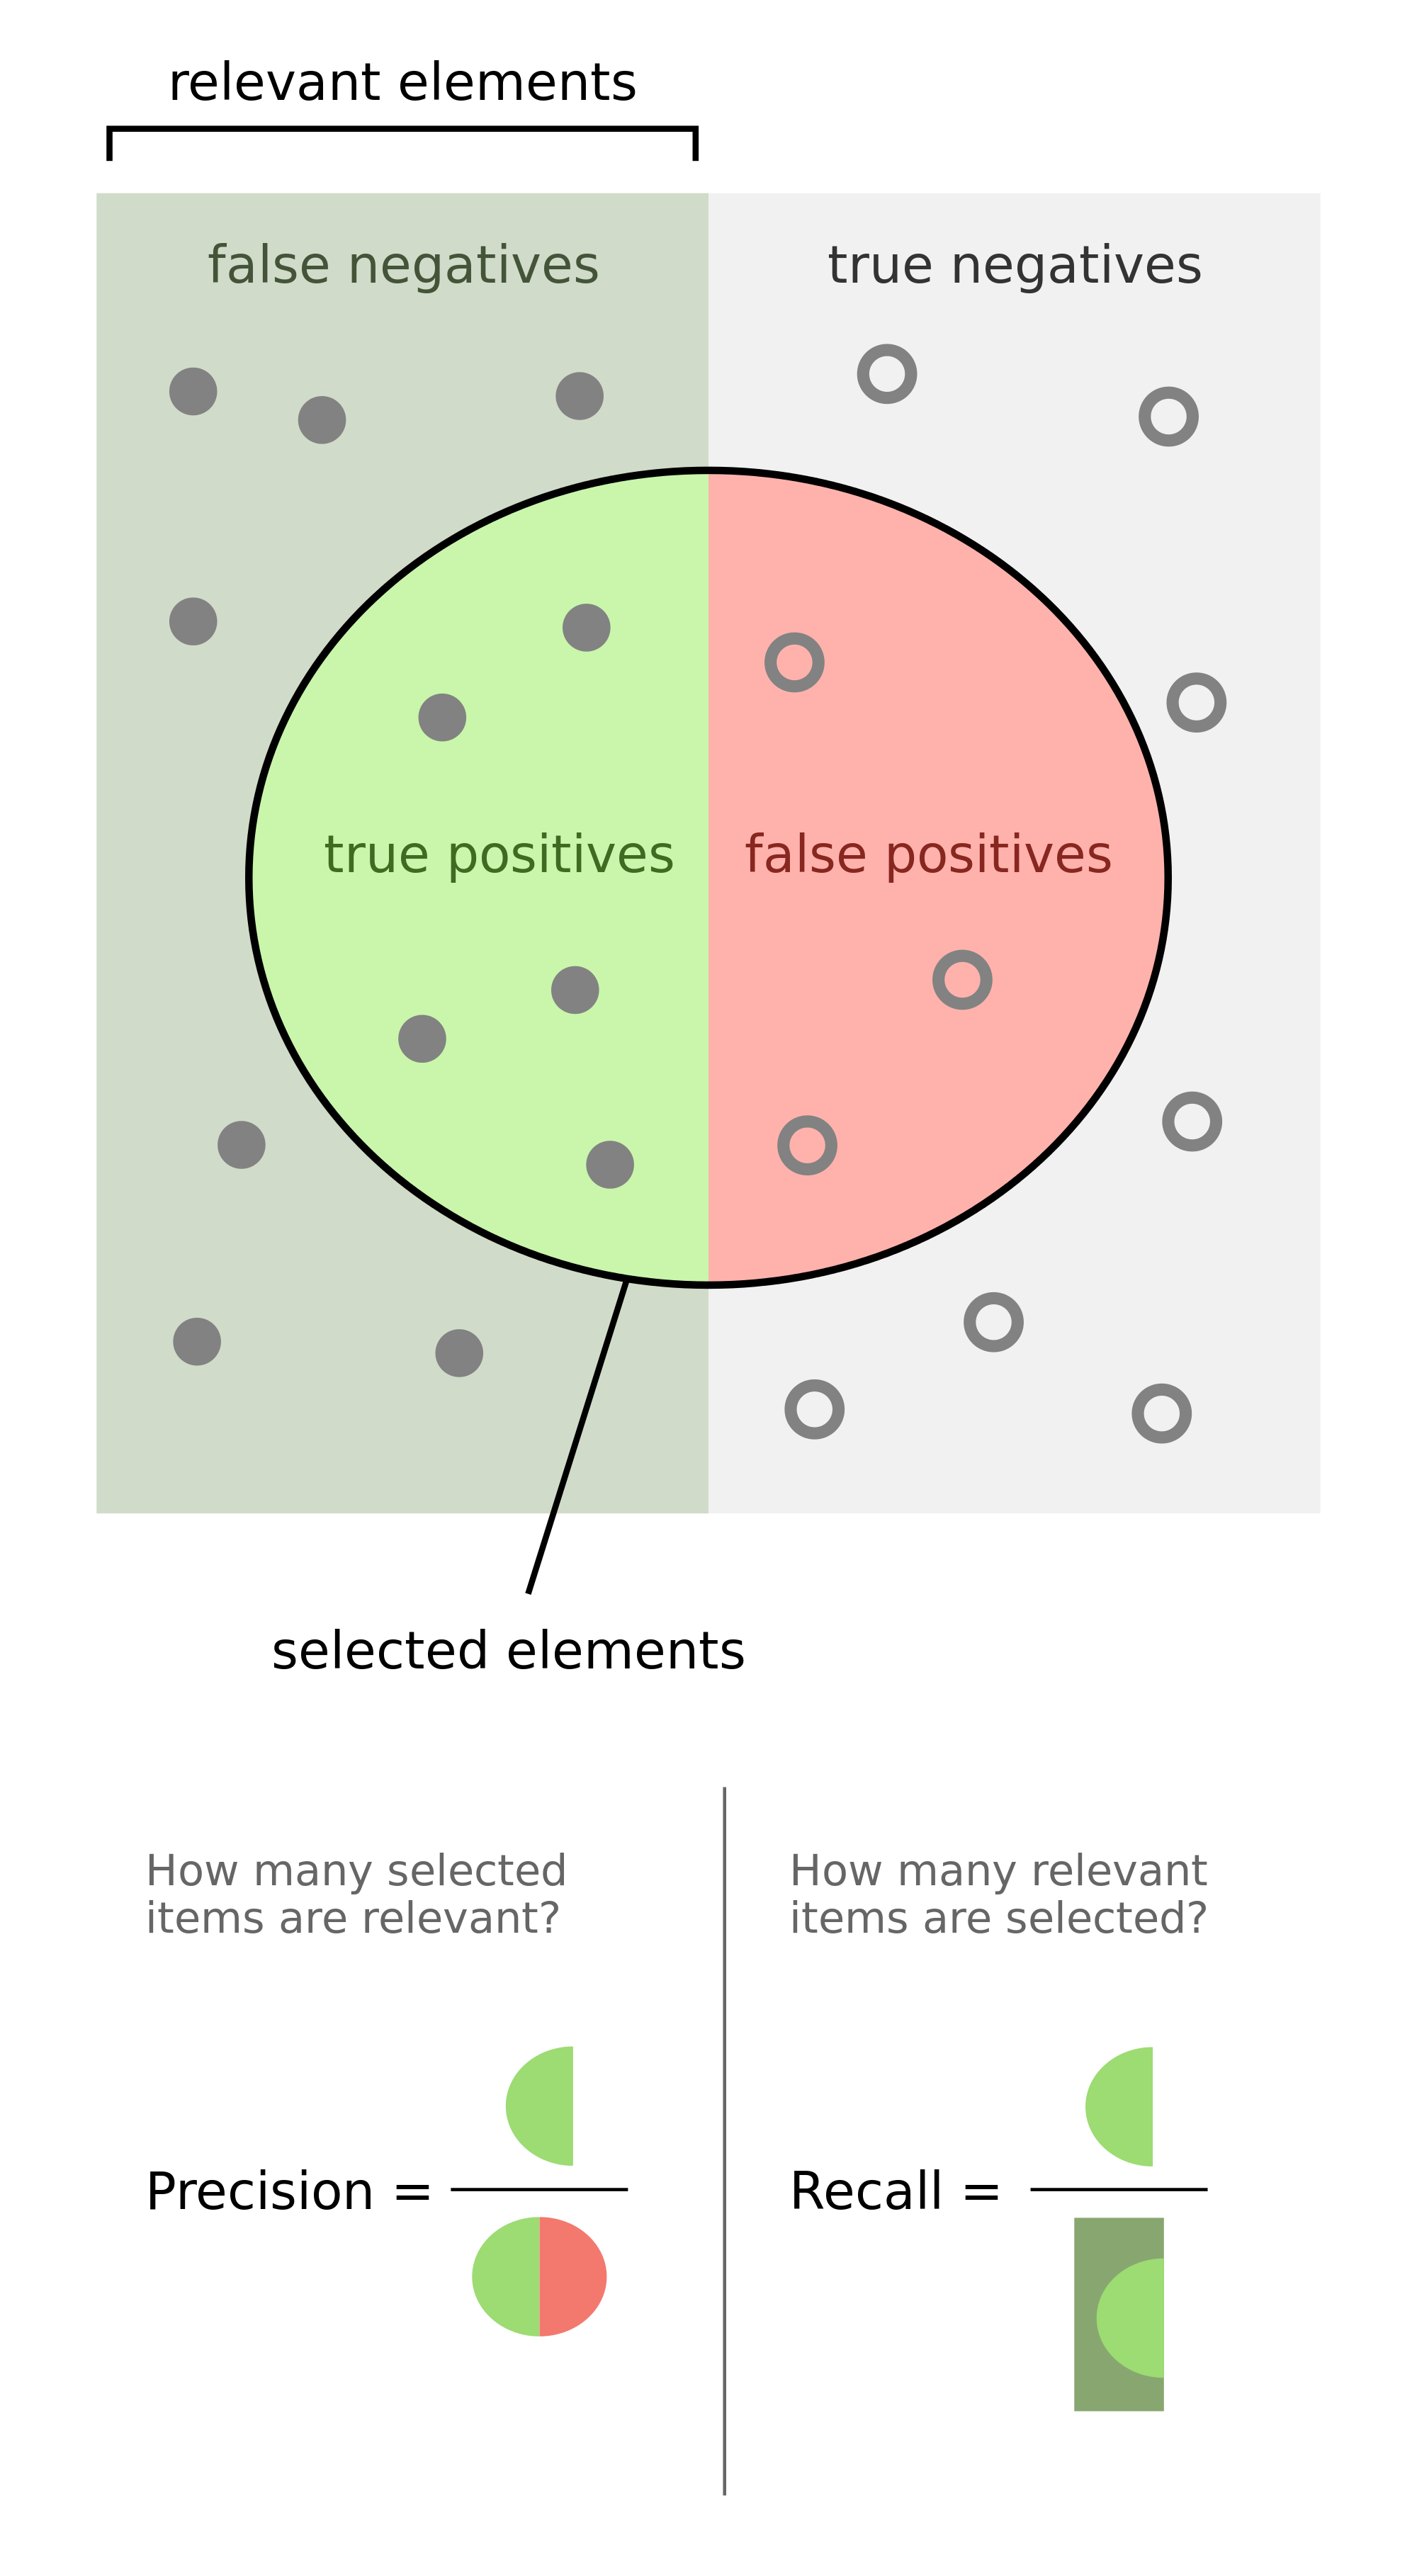

In [140]:
Image(filename='slides/metrics.png')

# Part 5: In summary...  

* Machine Learning (Scikit, Weka, etc) requires data wrangling. 

* There is no BEST algorithm, there are better algorithms for different problems

* Metrics which look too good to be true, are not true. 

* Dispite the intimidating name, most concepts in ML are not complicated, and it is "easy" to start. 

# Part 6: first steps on your own

#### Installing: 

Installing scikit-learn, pandas, ipython notebooks (the one you are looking at!) etc can be slow and boring. The best way to install them it to use Anaconda, by Continuum Analytics, that comes pre-installed with all the necessary packages, and (I think) works on Windows, Macs and Linux machines. 

#### Getting data: 

The best ways to get datasets are to go to Kaggle, or to UCI Machine Learning Repository. 

Google for: Machine Learning Dataset Wine Quality to find a cool Portuguese wines dataset, on which you can apply all that is in this notebook. 

#### Using Ipython Notebooks

When you get profissient with ipython you will probably want to run Python scripts directly, but until then working in Ipython Notebooks such as this is awesome for learning.

To do so (after you've installed Anaconda) just open your terminal and type:  
`ipython notebook`

#### More on Machine Learning: 

Many people who get involved non-professionally in Machine Learning start by Andrew NGs Stanford course on Coursera. It assumes no prior knowledge of the subject, and builds to a substantial knowledge base. 

For Python based Machine Learning in Lisbon, the Open Data Meetup holds regular meetings to learn and try our different algorithms and techniques.